In [40]:
from sklearn.linear_model import LinearRegression

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
from sklearn.metrics import r2_score

# define iterable dataframes
dfs = [pd.read_csv(f'IPEDS_201{yr}.csv') for yr in range(7, 10)]
year = 17

df_coeff = pd.DataFrame()

# for each dataframe
for df in dfs:
    # setting index
    df = df.set_index('UnitID')

    # isolating x features and x data
    x_feat_list = df.loc[:, 'Percent of students awarded Pell grants']

    x = np.array(df.loc[:, 'Percent of students awarded Pell grants'])
    
    # isolating y feature and y data
    y_feat = 'ACT Composite 75th percentile'
    y = df.loc[:, y_feat]

    # reshape x to specify it is 1 feature and many samples
    x = x.reshape((-1, 1))

    # initialize sklearn model
    reg = LinearRegression()

    # fit the model
    reg.fit(x, y)

    # same as a_1
    slope = reg.coef_[0]

    # same as a_0
    intercept = reg.intercept_
    
    # defining labels for graph
    pred_label = f'Predicted {y_feat}'
    act_label = f'Actual {y_feat}'

    # creating new dataframe with predicted and true data
    y_pred = pd.DataFrame(reg.predict(x), columns = [pred_label])
    df_true_pred = pd.concat([y, y_pred], axis = 1)
    df_true_pred.T

    # calculating r2
    r2 = r2_score(y_pred = y_pred, y_true = y)

    '''# plotting
    plt.rcParams['figure.figsize'] = (4, 4)
    plt.figure(dpi = 300)
    plt.scatter(y, y_pred, s = 5)
    plt.plot([x.min(), x.max()], [slope * x.min() + intercept, slope * x.max() + intercept], '--', c = 'black', alpha = 0.5)
    plt.xlabel(act_label)
    plt.ylabel(pred_label)
    plt.title(f'{y_feat} vs {x_feat_list} \n for 20{year}-20{year + 1} Data ($R^2$ = {r2:.3f})')'''
    
    year += 1
    
df_coeff

""


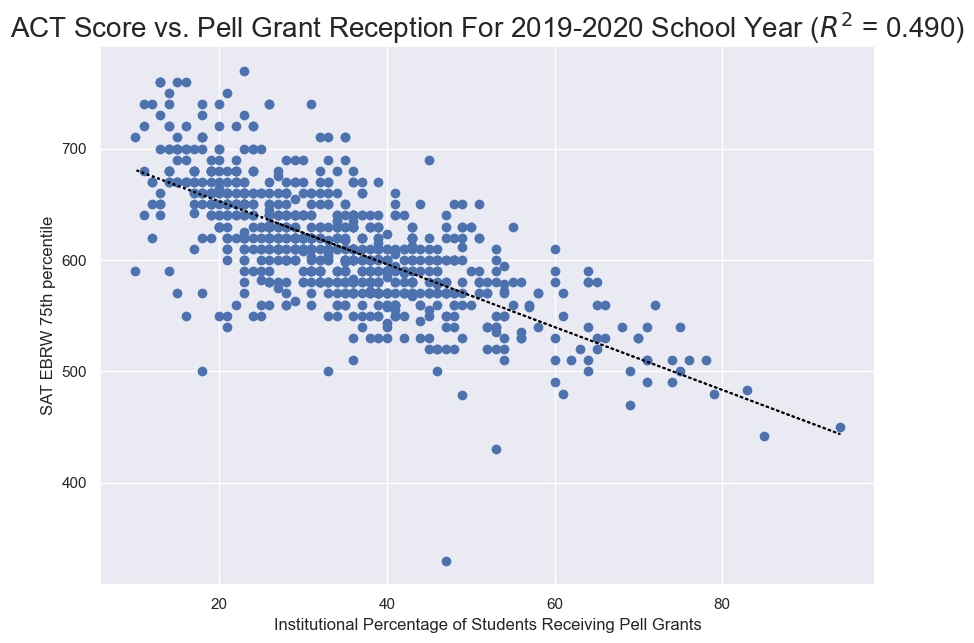

In [39]:
# importing libraries
import numpy as np
from sklearn.metrics import r2_score

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='y_true')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='y_pred (regression)')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        # compute predicted position
        y_pred_i = slope * x_i + intercept
    
    
    # plt.legend()
    plt.xlabel('Institutional Percentage of Students Receiving Pell Grants')
    plt.ylabel(y_feat)
    
    # compute mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    
    R2 = r2_score(y_true=y, y_pred=y_pred)
    
    sns.set()
    
    # add title which shows model and MSE
    plt.title(f'ACT Score vs. Pell Grant Reception For 2019-2020 School Year ($R^2$ = {R2:.3f})', fontsize = 20)
    plt.gcf().set_size_inches(10, 7)
    
show_fit(x, y, slope, intercept)